In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pprint
import datetime
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv ('Resources/GeneralEsportData.csv')
#print(df)

In [3]:
df1 = pd.read_csv ('Resources/HistoricalEsportData.csv')

print(df1)

           Date                   Game  Earnings  Players  Tournaments
0      1/1/1998             QuakeWorld  15000.00        8            1
1      5/1/1998               Quake II  14600.00        4            1
2      7/1/1998               Quake II  15000.00        5            1
3      7/1/1998             QuakeWorld   6500.00        4            1
4     11/1/1998               Quake II  36600.00       13            2
...         ...                    ...       ...      ...          ...
6837   7/1/2021               Mythgard   1000.00        4            1
6838   7/1/2021                   osu!    780.00       16            1
6839   7/1/2021                Xonotic    746.71        8            1
6840   7/1/2021             Diabotical    370.73        6            5
6841   7/1/2021  Them's Fightin' Herds     45.15        3            2

[6842 rows x 5 columns]


In [4]:
df1 = df1[df1['Earnings'] > 0.0]
#df1.head
df1

,Date,Game,Earnings,Players,Tournaments
0,1/1/1998,QuakeWorld,15000.00,8,1
1,5/1/1998,Quake II,14600.00,4,1
2,7/1/1998,Quake II,15000.00,5,1
3,7/1/1998,QuakeWorld,6500.00,4,1
4,11/1/1998,Quake II,36600.00,13,2
...,...,...,...,...,...
6837,7/1/2021,Mythgard,1000.00,4,1
6838,7/1/2021,osu!,780.00,16,1
6839,7/1/2021,Xonotic,746.71,8,1
6840,7/1/2021,Diabotical,370.73,6,5


In [5]:
df1['Date']= pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y')

df1


,Date,Game,Earnings,Players,Tournaments
0,1998,QuakeWorld,15000.00,8,1
1,1998,Quake II,14600.00,4,1
2,1998,Quake II,15000.00,5,1
3,1998,QuakeWorld,6500.00,4,1
4,1998,Quake II,36600.00,13,2
...,...,...,...,...,...
6837,2021,Mythgard,1000.00,4,1
6838,2021,osu!,780.00,16,1
6839,2021,Xonotic,746.71,8,1
6840,2021,Diabotical,370.73,6,5


In [6]:
df1[['Date']] = df1[['Date']].astype(float)
df1[['Tournaments']] = df1[['Tournaments']].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 0 to 6841
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6661 non-null   float64
 1   Game         6661 non-null   object 
 2   Earnings     6661 non-null   float64
 3   Players      6661 non-null   int64  
 4   Tournaments  6661 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 312.2+ KB


In [7]:
print(pd.unique(df['Genre']))

['Strategy' 'First-Person Shooter' 'Multiplayer Online Battle Arena'
 'Role-Playing Game' 'Fighting Game' 'Racing' 'Sports'
 'Collectible Card Game' 'Puzzle Game' 'Battle Royale'
 'Third-Person Shooter']


In [8]:
genre_totals_df= df
genre_totals_df[['TotalTournaments']] = genre_totals_df[['TotalTournaments']].astype(float)
genre_totals_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              535 non-null    object 
 1   ReleaseDate       535 non-null    int64  
 2   Genre             535 non-null    object 
 3   TotalEarnings     535 non-null    float64
 4   OnlineEarnings    535 non-null    float64
 5   TotalPlayers      535 non-null    int64  
 6   TotalTournaments  535 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 29.4+ KB


In [30]:
genre_totals_df= genre_totals_df.drop('OnlineEarnings', 1)
genre_totals_df = genre_totals_df[genre_totals_df['TotalEarnings'] > 0.0]
#genre_totals_df[['ReleaseDate']] = genre_totals_df[['ReleaseDate']].astype(int)
genre_totals_df['Result'] = genre_totals_df['TotalEarnings']/genre_totals_df['TotalTournaments']

genre_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              490 non-null    object 
 1   ReleaseDate       490 non-null    int32  
 2   Genre             490 non-null    object 
 3   TotalEarnings     490 non-null    float64
 4   TotalPlayers      490 non-null    int64  
 5   TotalTournaments  490 non-null    float64
 6   Result            490 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 28.7+ KB


In [18]:
df1['Result'] = df1['Earnings']/df1['Tournaments']
df1

,Date,Game,Earnings,Players,Tournaments,Result
0,1998.0,QuakeWorld,15000.00,8,1.0,15000.000
1,1998.0,Quake II,14600.00,4,1.0,14600.000
2,1998.0,Quake II,15000.00,5,1.0,15000.000
3,1998.0,QuakeWorld,6500.00,4,1.0,6500.000
4,1998.0,Quake II,36600.00,13,2.0,18300.000
...,...,...,...,...,...,...
6837,2021.0,Mythgard,1000.00,4,1.0,1000.000
6838,2021.0,osu!,780.00,16,1.0,780.000
6839,2021.0,Xonotic,746.71,8,1.0,746.710
6840,2021.0,Diabotical,370.73,6,5.0,74.146


In [19]:
Strategy_df=genre_totals_df.loc[genre_totals_df['Genre']=='Strategy']
First_Person_Shooter_df=genre_totals_df.loc[genre_totals_df['Genre']=='First-Person Shooter']
Multiplayer_Online_Battle_Arena_df=genre_totals_df.loc[genre_totals_df['Genre']=='Multiplayer Online Battle Arena']
Role_Playing_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Role-Playing Game']
Fighting_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Fighting Game']
Racing_df=genre_totals_df.loc[genre_totals_df['Genre']=='Racing']
Sports_df=genre_totals_df.loc[genre_totals_df['Genre']=='Sports']
Collectible_Card_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Collectible Card Game']
Puzzle_Game_df=genre_totals_df.loc[genre_totals_df['Genre']=='Puzzle Game']
Battle_Royale_df=genre_totals_df.loc[genre_totals_df['Genre']=='Battle Royale']
Third_Person_Shooter_df=genre_totals_df.loc[genre_totals_df['Genre']=='Third-Person Shooter']

Strategy_df

#First_Person_Shooter_df

,Game,ReleaseDate,Genre,TotalEarnings,TotalPlayers,TotalTournaments,Result
0,Age of Empires,1997.0,Strategy,190262.81,255,96.0,1981.904271
1,Age of Empires II,1999.0,Strategy,1949008.74,1357,989.0,1970.686289
2,Age of Empires III,2005.0,Strategy,68613.85,108,77.0,891.088961
3,Age of Empires Online,2011.0,Strategy,4078.56,19,12.0,339.880000
4,Age of Mythology,2002.0,Strategy,52360.00,22,6.0,8726.666667
5,Among Us,2018.0,Strategy,86000.00,14,8.0,10750.000000
6,Auto Chess,2019.0,Strategy,1136420.28,112,8.0,142052.535000
7,Brawl Stars,2018.0,Strategy,1557950.00,212,30.0,51931.666667
8,Chess.com,2007.0,Strategy,1340988.94,679,234.0,5730.721966
9,chess24,2014.0,Strategy,2205625.43,74,16.0,137851.589375


In [20]:
#x1=df1['Date']
#x = df1.Date.values.reshape(-1, 1)
#y1=df1['Result']
#y = df1.Result.values.reshape(-1, 1)
#game=df1['Game']


In [37]:
#x2=Strategy_df.ReleaseDate.values.reshape(-1, 1)
#y2=Strategy_df.TotalEarnings.values.reshape(-1, 1)

x=Strategy_df['ReleaseDate']
y=Strategy_df['Result']


In [41]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
print("intercept: "+ str(res.intercept))
print("slope: "+ str(res.slope))

R-squared: 0.048792
intercept: -4172474.1322328397
slope: 2091.039607621521


NameError: name 'x' is not defined

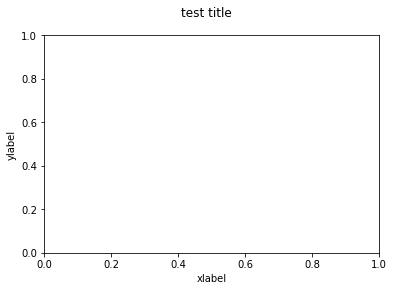

<Figure size 720x360 with 0 Axes>

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure()
fig.suptitle('test title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, int(res.intercept) + int(res.slope)*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

In [ ]:
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])
print(x_min)
print(x_max)

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [ ]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(y_min)
print(y_max)
y_min_actual=y.min()
y_max_actual=y.max()
print(y_min_actual)
print(y_max_actual)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(x)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
plt.scatter(x, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
print('y=2784x-5580599')